In [22]:
import json
import matplotlib.pyplot as plt

def plot_loss_over_steps(filename, model_name="test", color="b"):
    """
    Reads a JSON file, extracts loss and step data, and plots the loss over steps.

    Parameters:
        filename (str): The path to the JSON file containing the training log.
        model_name (str): The name of the model to be used in the plot label.
        color (str): The color of the plot line.

    Returns:
        None
    """
    try:
        # Read the JSON file
        with open(filename, "r") as file:
            data = json.load(file)

        # Extract steps and losses
        steps = [entry["step"] for entry in data if "step" in entry and "loss" in entry]
        losses = [entry["loss"] for entry in data if "step" in entry and "loss" in entry]

        # Check if there are valid data points to plot
        if not steps or not losses:
            print("No loss or step data found in the file.")
            return

        # Plot the data
        text_size = 20
        plt.plot(steps, losses, marker='o', linestyle='-', color=color, label=model_name)
        plt.title("Loss over training batches", size = text_size)
        plt.xlabel("Batches", size = text_size)
        plt.ylabel("Loss", size = text_size)
        plt.grid(True)
        plt.legend(fontsize=18)

    except FileNotFoundError:
        print(f"File not found: {filename}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON in file: {filename}")
    except Exception as e:
        print(f"An error occurred: {e}")


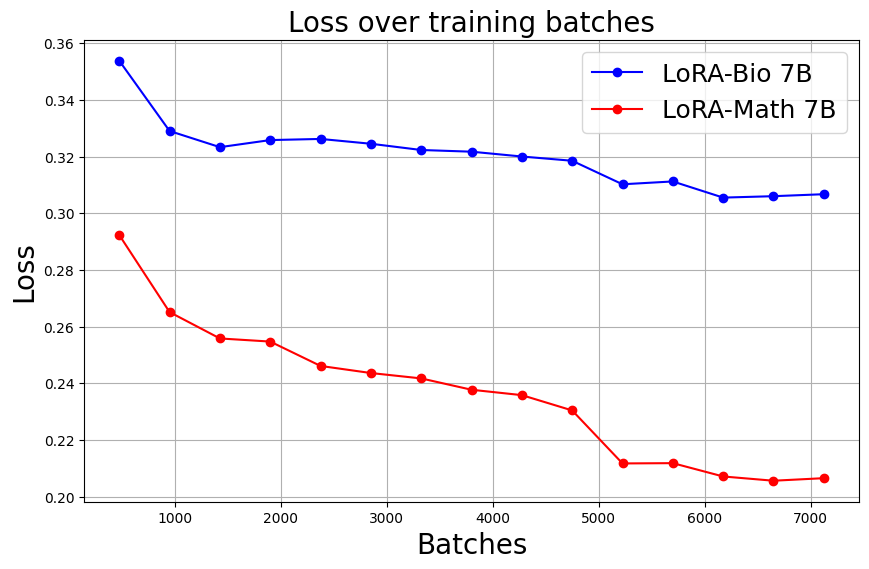

In [23]:
plt.figure(figsize=(10, 6))
plot_loss_over_steps("Mistral-7B-Instruct-v0.1_Bio_log_history.json", "LoRA-Bio 7B")
plot_loss_over_steps("Mistral-7B-Instruct-v0.1_Math_log_history.json", "LoRA-Math 7B", "r")

plt.show()